In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_iris  # 사이킷런 패키지 임포트

iris = load_iris()  # 데이터 로드
iris.data[0, :]  # 첫 번째 꽃의 데이터

array([5.1, 3.5, 1.4, 0.2])

In [3]:
x1 = np.array([[5.1], [3.5], [1.4], [0.2]])
x1

array([[5.1],
       [3.5],
       [1.4],
       [0.2]])

In [7]:
x1.shape

(4, 1)

In [9]:
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False    # minus 표시
mpl.rc('font', family='Malgun Gothic')

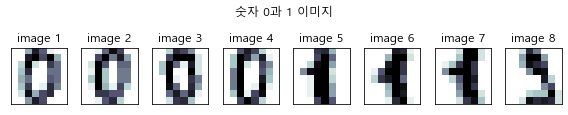

In [10]:
from sklearn.datasets import load_digits  # 패키지 임포트

digits = load_digits()  # 데이터 로드
samples = [0, 10, 20, 30, 1, 11, 21, 31]  # 선택된 이미지 번호
d = []
for i in range(8):
    d.append(digits.images[samples[i]])

plt.figure(figsize=(8, 2))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title(f"image {i + 1}")
plt.suptitle("숫자 0과 1 이미지")
plt.tight_layout()
plt.show()

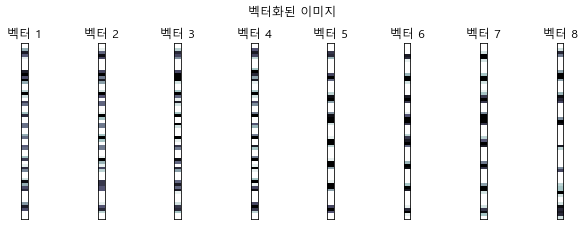

In [11]:
v = []
for i in range(8):
    v.append(d[i].reshape(64, 1))  # 벡터화
    
plt.figure(figsize=(8, 3))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(v[i], aspect=0.4,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title(f"벡터 {i + 1}")
plt.suptitle("벡터화된 이미지", y=1.05)
plt.tight_layout(w_pad=7)
plt.show()

In [12]:
from scipy import misc  # 패키지 임포트

img_rgb = misc.face()  # 컬러 이미지 로드
img_rgb.shape  # 데이터의 모양

(768, 1024, 3)

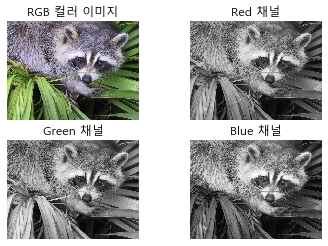

In [13]:
plt.subplot(221)
plt.imshow(img_rgb, cmap=plt.cm.gray)  # 컬러 이미지 출력
plt.axis("off")
plt.title("RGB 컬러 이미지")

plt.subplot(222)
plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.gray)  # red 채널 출력
plt.axis("off")
plt.title("Red 채널")

plt.subplot(223)
plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.gray)  # green 채널 출력
plt.axis("off")
plt.title("Green 채널")

plt.subplot(224)
plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.gray)  # blue 채널 출력
plt.axis("off")
plt.title("Blue 채널")

plt.show()

In [14]:
p = [100, 80, 50]
n = [3, 4, 5]
np.dot(p, n)

870

### 코사인 유사도

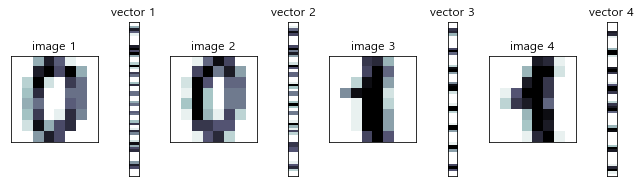

In [15]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64, 1)
v2 = d2.reshape(64, 1)
v3 = d3.reshape(64, 1)
v4 = d4.reshape(64, 1)

plt.figure(figsize=(9, 9))
gs = gridspec.GridSpec(1, 8, height_ratios=[1],
                       width_ratios=[9, 1, 9, 1, 9, 1, 9, 1])
for i in range(4):
    plt.subplot(gs[2 * i])
    plt.imshow(eval(f"d{i + 1}"), aspect=1,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title(f"image {i + 1}")
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval(f"v{i + 1}"), aspect=0.25,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title(f"vector {i + 1}")
plt.tight_layout()
plt.show()

In [16]:
(v1.T @ v2)[0][0], (v3.T @ v4)[0][0]

(3064.0, 3661.0)

In [17]:
(v1.T @ v3)[0][0], (v1.T @ v4)[0][0], (v2.T @ v3)[0][0], (v2.T @ v4)[0][0]

(1866.0, 1883.0, 2421.0, 2479.0)

#### 연습문제 2.2.3

In [18]:
from sklearn.datasets import load_digits
X = load_digits().data
X.shape

(1797, 64)

In [24]:
d1 = X[0].reshape(64, 1)    # 첫번째
d10 = X[9].reshape(64, 1)   # 10번째
sim = d1.T @ d10            # 이미지 유사도
sim[0, 0]

2807.0

In [26]:
mat = X @ X.T
mat.shape

(1797, 1797)

In [28]:
mat[0, 9], mat[9, 0]

(2807.0, 2807.0)

### 선형회귀 모형